<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/LINEAR_REGRESSION_WITH_NEWSPAPER_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data Set**

In [ ]:
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
data['Newspaper'].nunique()  # counts the number of unique values in 'newspaper' column

34

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


# Correlation

In [ ]:
data.drop('Newspaper',axis=1,inplace=True)
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

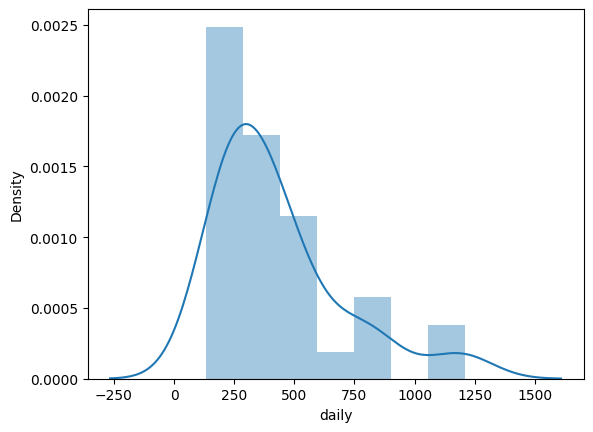

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['daily'])
plt.show()

<Axes: xlabel='sunday', ylabel='Density'>

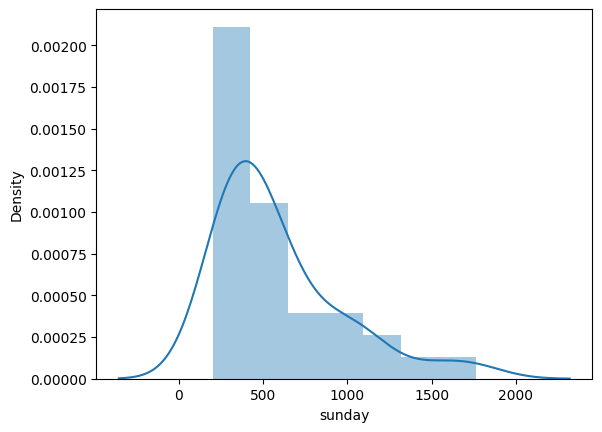

In [ ]:
import seaborn as sns
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           6.02e-19
Time:                        15:18:50   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

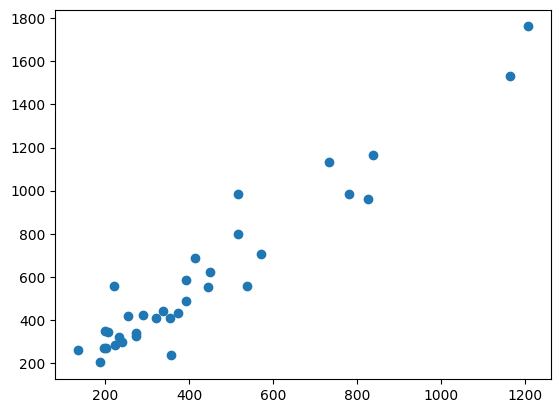

In [ ]:
plt.scatter(data["daily"],data["sunday"])

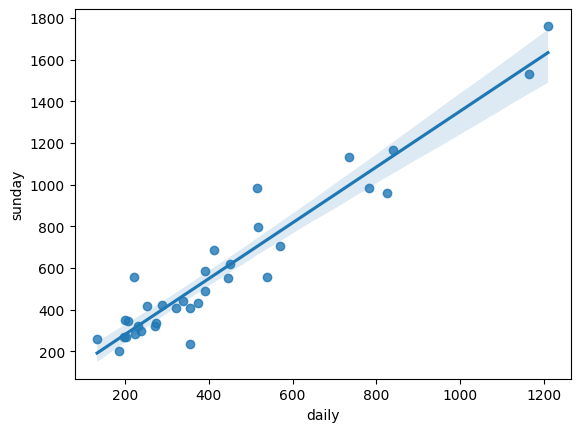

In [ ]:
sns.regplot(x="daily", y="sunday", data=data,ci=95);

In [ ]:
#Coefficients
model.params

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

# Predict for new data point

In [ ]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([291,516,355,238,537])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(data_pred)

,0
0,403.692624
1,705.128445
2,489.434369
3,332.687742
4,733.262455
